# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline

# Importing data

In [3]:
path = 'C:/Users/Owner/OneDrive/Desktop/Data Analytics/Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, 'sub.csv'), parse_dates=['year'])

In [5]:
sub = df[['year', 'price']]

In [6]:
sub.head()

,year,price
0,1900-01-01,200000
1,1900-01-01,199999
2,1900-01-01,214000
3,1900-01-01,169900
4,1900-01-01,240000


In [7]:
#Grouping the data by year and obtaining mean

sub1 = sub.groupby('year').agg({'price': ['mean']})

In [8]:
sub1.head()

,price
,mean
year,
1900-01-01,581387.206897
1901-01-01,556935.931034
1902-01-01,673007.407407
1903-01-01,480958.195652
1904-01-01,583756.644444


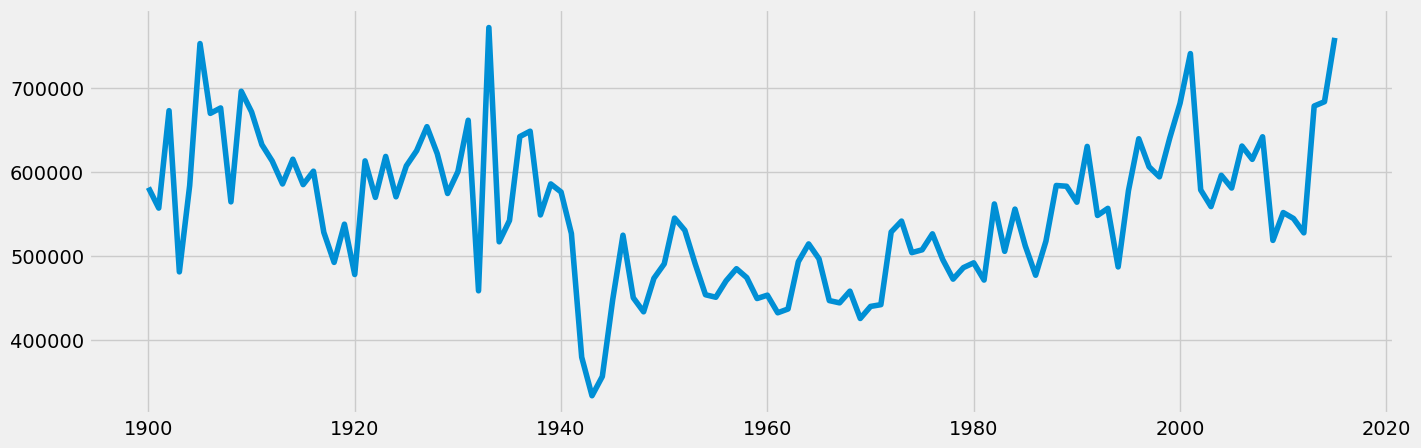

In [9]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub1)

# Decomposition

In [10]:
# Decompose the time series using a multiplicative model

decomposition = sm.tsa.seasonal_decompose(sub1, model='multiplicative')

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

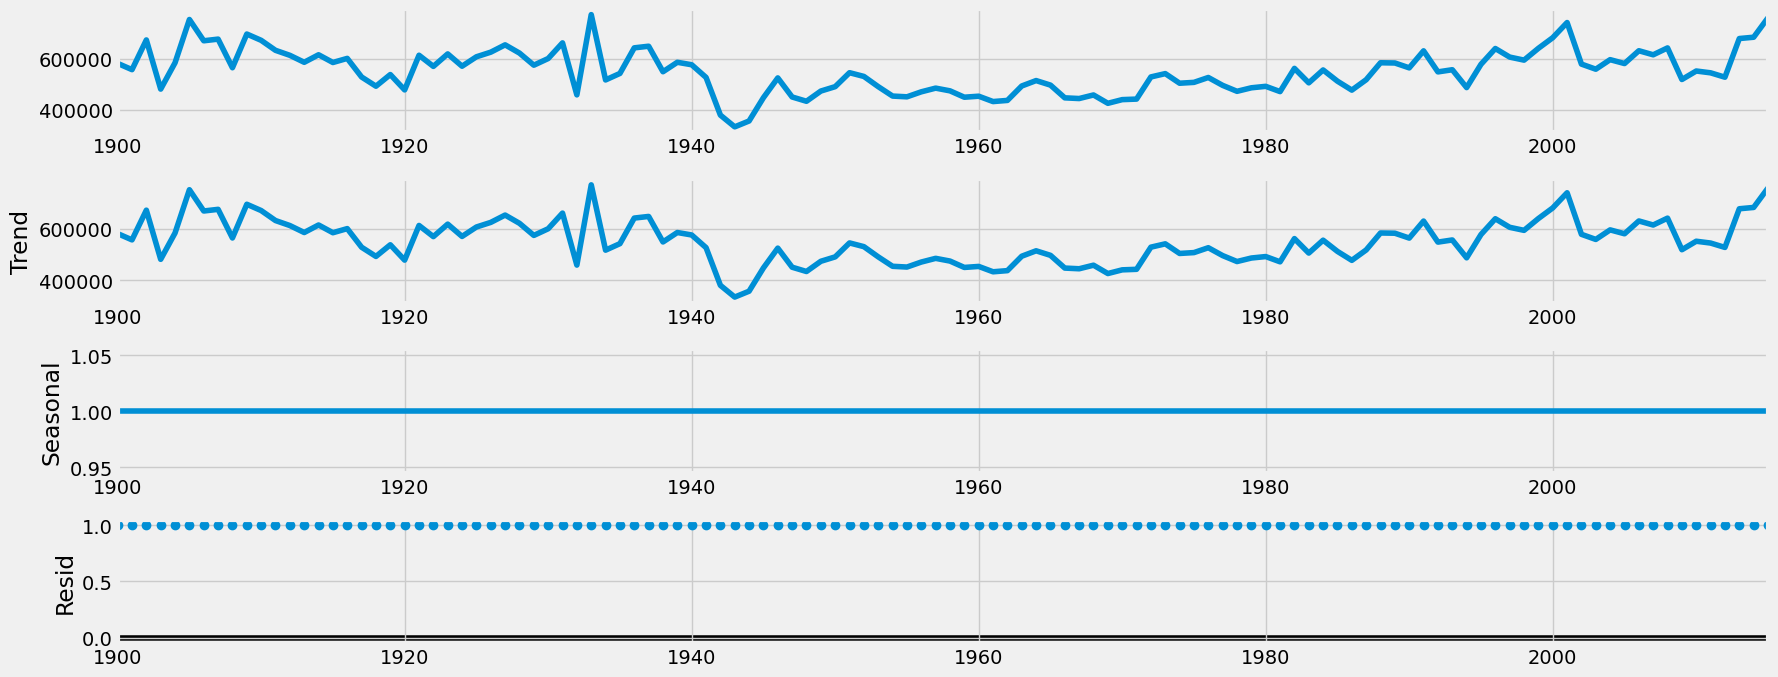

In [12]:
# Plot the separate components

decomposition.plot()
plt.show()


From my decomposition plot, I see that the trend is nonlinear and seasonality and noise are absent.

# Stationarity

In [14]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub1['price'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.984089
p-value                          0.036407
Number of Lags Used              1.000000
Number of Observations Used    114.000000
Critical Value (1%)             -3.489058
Critical Value (5%)             -2.887246
Critical Value (10%)            -2.580481
dtype: float64


From the results of the dickey-fuller test I see that the p-value is less than 0.05 at 0.036407, so the result of the test is significant. Also, I see that the test statistic at -2.984089 is smaller than the 5% critical value of -2.887246, so I can reject the null hypothesis that "the year the house was built has no effect on the price".

# Autocorrelations

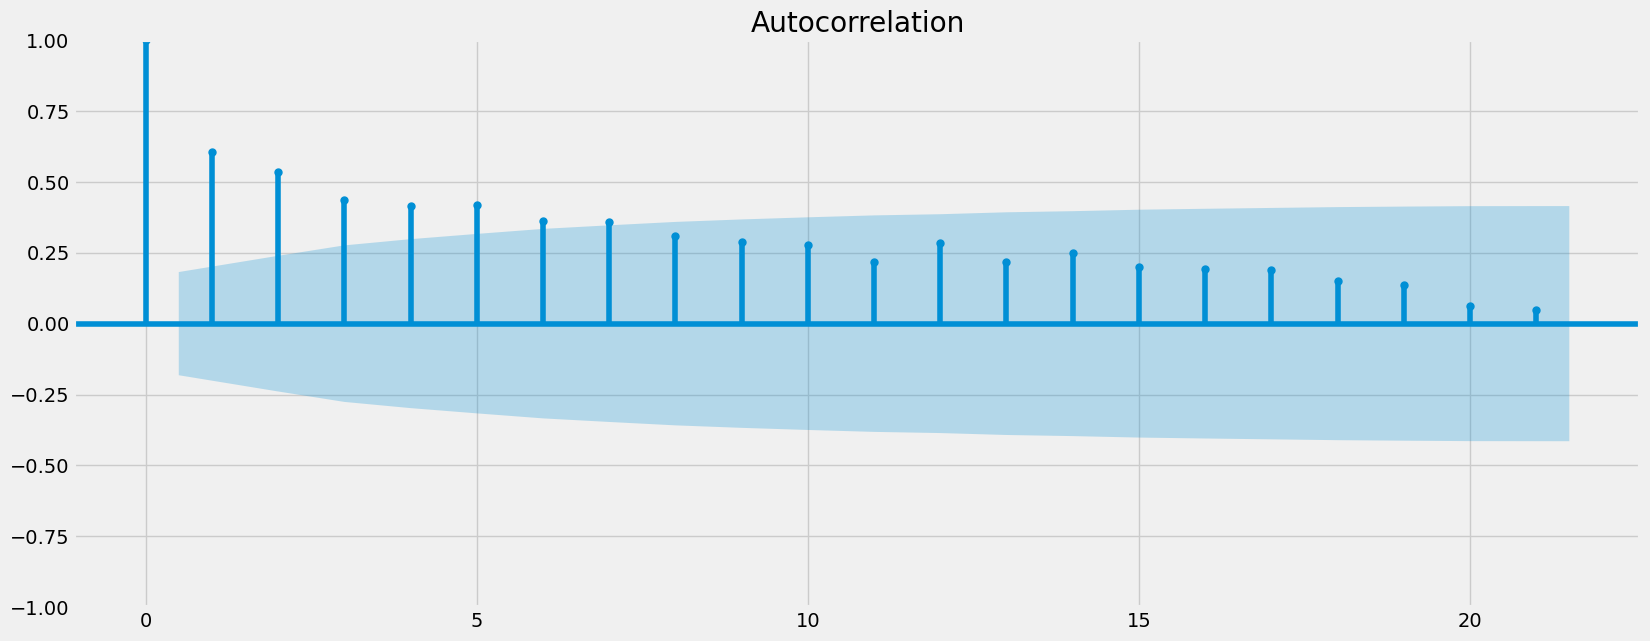

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sub1)
plt.show()

The plot shows very few autocorrelations which leads me to believe my data is in fact, stationary.